# data.table
## basics of advanced data management

In [38]:
rm(plouf)
library(data.table)
library(ggplot2)
library(nycflights13)
library(dplyr)

Warning message in rm(plouf):
"objet 'plouf' introuvable"

In [47]:
plouf <- flights
head(plouf[!is.na(plouf$dep_time)])

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     13  1        2249            72       108      2357          
2 2013 1     31  1        2100           181       124      2225          
3 2013 2     11  1        2100           181       111      2225          
4 2013 2     24  1        2245            76       121      2354          
5 2013 3      8  1        2355             6       431       440          
6 2013 3     18  1        2128           153       247      2355          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1  71       B6       22    N206JB  JFK    SYR   41       209     22   49    
2 179       WN      530    N550WN  LGA    MDW  127       725     21    0    
3 166       WN      530    N231WN  LGA    MDW  117       725     21    0    
4  87       B6      608    N216JB  JFK    PWM   56       273     22   45    
5  -9       B6      739    N586JB  JFK    PSE  189      1617     23   55    
6 172       B6       97    N760JB  JFK    DEN  234      1626     21   28    
  time_hour          
1 2013-01-13 22:00:00
2 2013-01-31 21:00:00
3 2013-02-11 21:00:00
4 2013-02-24 22:00:00
5 2013-03-08 23:00:00
6 2013-03-18 21:00:00

# the structure
You set a data table this way 

In [48]:
plouf <- setDT(plouf)
class(plouf)

[1] "data.table" "data.frame"

**how it works: **

<div class="alert alert-block alert-info">  <h1><center> plouf[ i , j , by] </center></h1> </div>

SQL like

* **i** is the subsetting for the row. It uses directly the column names
* **j** is where operation on columns are made. You can call the column, make operation, assign value to new column, etc
* **by** is to group by a variable: operation on j is made for each group of same value defined in the by section

## ordering your data.table

you can order your data.table along a column of interest. You can do it just once:

In [3]:
head(plouf[sort(dep_time)])

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   517      515            2         830      819           
2 2013 1     1   517      515            2         830      819           
3 2013 1     1   517      515            2         830      819           
4 2013 1     1   517      515            2         830      819           
5 2013 1     1   517      515            2         830      819           
6 2013 1     1   517      515            2         830      819           
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1 11        UA      1545   N14228  EWR    IAH  227      1400     5    15    
2 11        UA      1545   N14228  EWR    IAH  227      1400     5    15    
3 11        UA      1545   N14228  EWR    IAH  227      1400     5    15    
4 11        UA      1545   N14228  EWR    IAH  227      1400     5    15    
5 11        UA      1545   N14228  EWR    IAH  227      1400     5    15    
6 11        UA      1545   N14228  EWR    IAH  227      1400     5    15    
  time_hour          
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00
3 2013-01-01 05:00:00
4 2013-01-01 05:00:00
5 2013-01-01 05:00:00
6 2013-01-01 05:00:00

In [4]:
head(plouf)

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   517      515             2         830      819          
2 2013 1     1   533      529             4         850      830          
3 2013 1     1   542      540             2         923      850          
4 2013 1     1   544      545            -1        1004     1022          
5 2013 1     1   554      600            -6         812      837          
6 2013 1     1   554      558            -4         740      728          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1  11       UA      1545   N14228  EWR    IAH  227      1400     5    15    
2  20       UA      1714   N24211  LGA    IAH  227      1416     5    29    
3  33       AA      1141   N619AA  JFK    MIA  160      1089     5    40    
4 -18       B6       725   N804JB  JFK    BQN  183      1576     5    45    
5 -25       DL       461   N668DN  LGA    ATL  116       762     6     0    
6  12       UA      1696   N39463  EWR    ORD  150       719     5    58    
  time_hour          
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00
3 2013-01-01 05:00:00
4 2013-01-01 05:00:00
5 2013-01-01 06:00:00
6 2013-01-01 05:00:00

or permanently :

In [5]:
setkey(plouf,dep_time)
head(plouf)

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   NA       1630           NA        NA       1815          
2 2013 1     1   NA       1935           NA        NA       2240          
3 2013 1     1   NA       1500           NA        NA       1825          
4 2013 1     1   NA        600           NA        NA        901          
5 2013 1     2   NA       1540           NA        NA       1747          
6 2013 1     2   NA       1620           NA        NA       1746          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1 NA        EV      4308   N18120  EWR    RDU  NA        416     16   30    
2 NA        AA       791   N3EHAA  LGA    DFW  NA       1389     19   35    
3 NA        AA      1925   N3EVAA  LGA    MIA  NA       1096     15    0    
4 NA        B6       125   N618JB  JFK    FLL  NA       1069      6    0    
5 NA        EV      4352   N10575  EWR    CVG  NA        569     15   40    
6 NA        EV      4406   N13949  EWR    PIT  NA        319     16   20    
  time_hour          
1 2013-01-01 16:00:00
2 2013-01-01 19:00:00
3 2013-01-01 15:00:00
4 2013-01-01 06:00:00
5 2013-01-02 15:00:00
6 2013-01-02 16:00:00

you can set multiple keys

In [6]:
setkeyv(plouf, c("month","day"))
head(plouf)

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1    NA      1630           NA         NA      1815          
2 2013 1     1    NA      1935           NA         NA      2240          
3 2013 1     1    NA      1500           NA         NA      1825          
4 2013 1     1    NA       600           NA         NA       901          
5 2013 1     1   517       515            2        830       819          
6 2013 1     1   533       529            4        850       830          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1 NA        EV      4308   N18120  EWR    RDU   NA       416     16   30    
2 NA        AA       791   N3EHAA  LGA    DFW   NA      1389     19   35    
3 NA        AA      1925   N3EVAA  LGA    MIA   NA      1096     15    0    
4 NA        B6       125   N618JB  JFK    FLL   NA      1069      6    0    
5 11        UA      1545   N14228  EWR    IAH  227      1400      5   15    
6 20        UA      1714   N24211  LGA    IAH  227      1416      5   29    
  time_hour          
1 2013-01-01 16:00:00
2 2013-01-01 19:00:00
3 2013-01-01 15:00:00
4 2013-01-01 06:00:00
5 2013-01-01 05:00:00
6 2013-01-01 05:00:00

## subsetting i
<div class="alert alert-block alert-info">  <h1><center>  plouf[i,j,by] </center></h1> </div>

In [57]:
head(plouf[month == 2 & day == 3 & origin == "JFK" &(dest == "MIA" | dest == "RDU")])

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 2     3   536      540            -4         927      850          
2 2013 2     3   758      800            -2        1138     1124          
3 2013 2     3   825      810            15        1048      955          
4 2013 2     3   844      715            89        1210     1045          
5 2013 2     3   912      915            -3        1134     1101          
6 2013 2     3   917      900            17        1235     1220          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1 37        AA      1141   N5EBAA  JFK    MIA  164      1089     5    40    
2 14        DL      2143   N339NW  JFK    MIA  149      1089     8     0    
3 53        MQ      4406   N828MQ  JFK    RDU   74       427     8    10    
4 85        AA       443   N319AA  JFK    MIA  156      1089     7    15    
5 33        B6      1103   N178JB  JFK    RDU   71       427     9    15    
6 15        AA       647   N5CEAA  JFK    MIA  154      1089     9     0    
  time_hour           meanair_time
1 2013-02-03 05:00:00 152.12998   
2 2013-02-03 08:00:00 152.12998   
3 2013-02-03 08:00:00  71.85719   
4 2013-02-03 07:00:00 152.12998   
5 2013-02-03 09:00:00  71.85719   
6 2013-02-03 09:00:00 152.12998

You can also use number

In [44]:
plouf[1:5,]

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   NA       1630           NA        NA       1815          
2 2013 1     1   NA       1935           NA        NA       2240          
3 2013 1     1   NA       1500           NA        NA       1825          
4 2013 1     1   NA        600           NA        NA        901          
5 2013 1     2   NA       1540           NA        NA       1747          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1 NA        EV      4308   N18120  EWR    RDU  NA        416     16   30    
2 NA        AA       791   N3EHAA  LGA    DFW  NA       1389     19   35    
3 NA        AA      1925   N3EVAA  LGA    MIA  NA       1096     15    0    
4 NA        B6       125   N618JB  JFK    FLL  NA       1069      6    0    
5 NA        EV      4352   N10575  EWR    CVG  NA        569     15   40    
  time_hour          
1 2013-01-01 16:00:00
2 2013-01-01 19:00:00
3 2013-01-01 15:00:00
4 2013-01-01 06:00:00
5 2013-01-02 15:00:00

# j : column selection and operation

simple selection:

In [9]:
plouf[month == 1 & day == 1 & origin == "JFK" &  dest == "RDU", dep_time ]

[1]  800  917 1240 1449 1743 1800 1928 2050 2209

<div class="alert alert-block alert-danger"> you need to let at least empty i </div>

In [10]:
plouf[ dep_time ]

ERROR: Error in eval(isub, parent.frame(), parent.frame()): objet 'dep_time' introuvable


In [11]:
head(plouf[ ,dep_time ])

[1]  NA  NA  NA  NA 517 533

<div class="alert alert-block alert-danger"> most of R base still works </div>

In [12]:
head(plouf$dep_time)
head(plouf[["dep_time"]])
head(plouf[,"dep_time"])

[1]  NA  NA  NA  NA 517 533

[1]  NA  NA  NA  NA 517 533

dep_time
1  NA     
2  NA     
3  NA     
4  NA     
5 517     
6 533

You can select various comuln by making a list. You can rename the output also

In [13]:
head(plouf[month == 1 & day == 1 & origin == "JFK" &  dest == "RDU",.(depart = dep_time,arr_time) ])
# or 
head(plouf[month == 1 & day == 1 & origin == "JFK" &  dest == "RDU", list(dep_time,arrivee = arr_time) ])

depart arr_time
1  800    949    
2  917   1052    
3 1240   1415    
4 1449   1651    
5 1743   1925    
6 1800   1945

dep_time arrivee
1  800      949   
2  917     1052   
3 1240     1415   
4 1449     1651   
5 1743     1925   
6 1800     1945

### **the column is a vector : you can select par of it, or give a condition:**

In [14]:
plouf[month == 1 & day == 1 & origin == "JFK" &  dest == "RDU", dep_time[dep_time > 1500] ]
plouf[month == 1 & day == 1 & origin == "JFK" &  dest == "RDU", dep_time[1:3] ]
plouf[month == 1 & day == 1 & origin == "JFK" &  dest == "RDU", dep_time[2:.N] ]


[1] 1743 1800 1928 2050 2209

[1]  800  917 1240

[1]  917 1240 1449 1743 1800 1928 2050 2209

.N gives you the length of the vector

## by : release the power of data.table
<div class="alert alert-block alert-info">  <h1><center>  plouf[i,j,by] </center></h1> </div>

The idea is to loop on the different value of a column. It make sense if you perform an operation on j or subset an ordered data.table

Example : get the mean time and sd from JFK for each destination

In [15]:
head(plouf[ origin == "JFK", mean(air_time,na.rm = T), by = dest])

dest V1      
1 FLL  152.0416
2 MIA  152.1300
3 BQN  194.2411
4 MCO  134.9204
5 PBI  144.0458
6 TPA  144.2784

column is by default V1. To give it a name, we can use the list

In [16]:
head(plouf[ origin == "JFK", .(mean = mean(air_time,na.rm = T), sd = sd(air_time,na.rm = T)), by = dest])
#or 
head(plouf[ origin == "JFK" & !is.na(air_time), .(mean = mean(air_time), sd = sd(air_time)), by = dest])

dest mean     sd       
1 FLL  152.0416 12.327611
2 MIA  152.1300 11.122881
3 BQN  194.2411  9.239541
4 MCO  134.9204 10.642250
5 PBI  144.0458 11.043138
6 TPA  144.2784 11.304297

dest mean     sd       
1 MIA  152.1300 11.122881
2 BQN  194.2411  9.239541
3 MCO  134.9204 10.642250
4 PBI  144.0458 11.043138
5 TPA  144.2784 11.304297
6 LAX  329.1511 18.171386

### you can group by multiple columns!!

for example I want the number of uncanceled flight  per month and per destination from JFK

In [54]:
nbrflight <- plouf[ origin == "JFK" & !is.na(dep_time), .N, by = .(dest,month)]
head(nbrflight)

dest month N  
1 SYR  1     109
2 PWM  2      74
3 PSE  3      31
4 DEN  3      60
5 ROC  3     173
6 BQN  4      37

## change  long  <-> wide format

In [56]:
dim(nbrflight)
unique(nbrflight$dest)

[1] 748   3

[1] "SYR" "PWM" "PSE" "DEN" "ROC" "BQN" "SFO" "BOS" "SJU" "TPA" "FLL" "LAX"
[13] "RDU" "MCO" "LAS" "AUS" "DCA" "BUF" "BTV" "CVG" "JAX" "PBI" "MSY" "SAT"
[25] "IAD" "CLT" "RIC" "ORD" "PHX" "PDX" "CMH" "SLC" "CLE" "SAN" "SEA" "ATL"
[37] "PHL" "BWI" "MIA" "RSW" "IAH" "HNL" "DTW" "SRQ" "CHS" "PIT" "MSP" "STT"
[49] "ACK" "HOU" "JAC" "MVY" "LGB" "DFW" "BHM" "PSP" "SJC" "BUR" "IND" "ORF"
[61] "STL" "BNA" "MKE" "SDF" "MEM" "OAK" "EGE" "MCI" "ABQ" "SMF"

not the best format to present it to people

In [18]:
wide <- dcast(nbrflight,month ~ dest, value.var = "N")
wide

month ABQ ACK ATL AUS BHM BNA BOS BQN BTV ... SFO SJC SJU SLC SMF SRQ STL
1   1    NA  NA  155 118 NA  60  478 62  123 ... 670 20  411 166 20  54  NA 
2   2    NA  NA  137 103 NA  51  417 54  101 ... 574 14  368 151 14  51  NA 
3   3    NA  NA  155 144 NA  57  482 62  116 ... 661 21  426 191 21  62  NA 
4   4     9  NA  151 120 NA  57  474 37   87 ... 657 30  377 181 25  60  NA 
5   5    31  21  155 124  1  60  488 33  116 ... 694 31  350 183 26  31  NA 
6   6    30  43  171 120 NA  57  492 59  118 ... 683 30  391 181 30  30  NA 
7   7    31  66  186 124 NA  58  511 62  124 ... 687 31  463 185 31  31  NA 
8   8    31  67  187 123 NA  59  519 62  124 ... 723 31  448 185 31  31  NA 
9   9    30  45  155 120 NA  58  473 32  119 ... 699 30  336 175 23  30  NA 
10 10    31  23  166 124 NA  59  494 31  119 ... 725 31  346 177 20  31  NA 
11 11    30  NA  151 121 NA  59  480 39   99 ... 672 31  369 165 17  30   1 
12 12    31  NA  156 118 NA  61  478 62  103 ... 693 28  442 166 24  31  NA 
   STT SYR TPA
1  34  109 214
2  30  101 196
3  36   94 246
4  34   88 236
5  31  120 235
6  30  114 243
7  31  122 272
8  27  125 278
9   9  109 241
10  8  107 249
11 16   93 268
12 44  112 278

the formula gives the lines function of the column you want, specifying what should be the value assigned.

In [19]:
long <- melt(wide,measure.vars = names(wide)[-1],variable.name = "dest",value.name = "N")
head(long)

month dest N 
1 1     ABQ  NA
2 2     ABQ  NA
3 3     ABQ  NA
4 4     ABQ   9
5 5     ABQ  31
6 6     ABQ  30

measure vars are the column you consider to be the same variable. Variable name will be the name of the variable, and value name the name of the value column

** to plot with ggplot, prefer the long format**

it allows you to use the color grouping and the nice wrap functions of ggplot!!! 

a tiny example: number of canceled flight function of carrier and destination, from JFK

In [ ]:
subset <- plouf[origin == "JFK" & is.na(dep_time), .N, by = .(dest,month,carrier)]
# nombre de vols annulés par destination, mois et transporteur

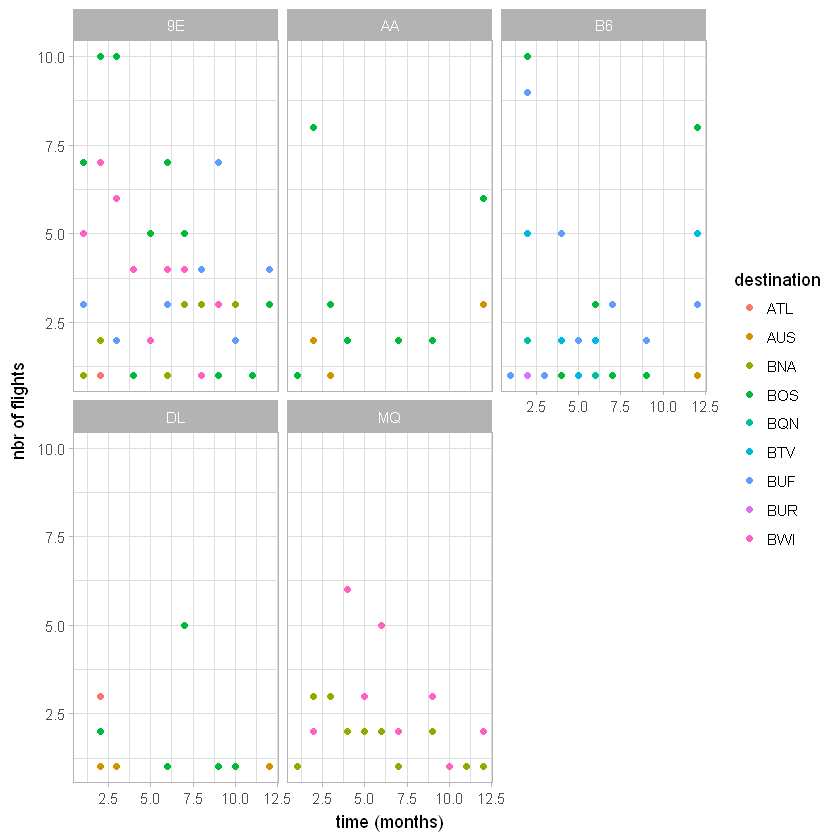

In [20]:
ggplot(data = subset[grepl("^A|^B",dest)],aes(month,N)) + 
geom_point(aes(color = as.factor(dest)))+
facet_wrap(~carrier)+
theme_light()+
labs(x = "time (months)",
      y = "nbr of flights",
      colour = "destination")

You can't do that in 5 lines with base R and normal plot function. **No way**. Maybe a 50 lines, and it will be uggly as hell.

## assigning new value

when you do that

In [21]:
head(plouf[ origin == "JFK", .(mean = mean(air_time,na.rm = T), sd = sd(air_time,na.rm = T)), by = dest])

dest mean     sd       
1 FLL  152.0416 12.327611
2 MIA  152.1300 11.122881
3 BQN  194.2411  9.239541
4 MCO  134.9204 10.642250
5 PBI  144.0458 11.043138
6 TPA  144.2784 11.304297

you produce an output without creating a new column in plouf. If you aim to create a column you can do it using

<div class="alert alert-block alert-info">  <h1><center> plouf[ i , new := j , by] </center></h1> </div>

In [49]:
plouf[ origin == "JFK", meanair_time := mean(air_time,na.rm = T), by = dest]
head(plouf)


year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   NA       1630           NA        NA       1815          
2 2013 1     1   NA       1935           NA        NA       2240          
3 2013 1     1   NA       1500           NA        NA       1825          
4 2013 1     1   NA        600           NA        NA        901          
5 2013 1     2   NA       1540           NA        NA       1747          
6 2013 1     2   NA       1620           NA        NA       1746          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1 NA        EV      4308   N18120  EWR    RDU  NA        416     16   30    
2 NA        AA       791   N3EHAA  LGA    DFW  NA       1389     19   35    
3 NA        AA      1925   N3EVAA  LGA    MIA  NA       1096     15    0    
4 NA        B6       125   N618JB  JFK    FLL  NA       1069      6    0    
5 NA        EV      4352   N10575  EWR    CVG  NA        569     15   40    
6 NA        EV      4406   N13949  EWR    PIT  NA        319     16   20    
  time_hour           meanair_time
1 2013-01-01 16:00:00       NA    
2 2013-01-01 19:00:00       NA    
3 2013-01-01 15:00:00       NA    
4 2013-01-01 06:00:00 152.0416    
5 2013-01-02 15:00:00       NA    
6 2013-01-02 16:00:00       NA

In [50]:
head(plouf[ origin == "JFK"])

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   NA        600           NA        NA        901          
2 2013 1     2   NA       1545           NA        NA       1910          
3 2013 1     4   NA        845           NA        NA       1015          
4 2013 1     5   NA       1400           NA        NA       1518          
5 2013 1     5   NA        840           NA        NA       1001          
6 2013 1     7   NA        820           NA        NA        958          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1 NA        B6       125   N618JB  JFK    FLL  NA       1069      6    0    
2 NA        AA       133   NA      JFK    LAX  NA       2475     15   45    
3 NA        9E      3405   NA      JFK    DCA  NA        213      8   45    
4 NA        EV      5712   N827AS  JFK    IAD  NA        228     14    0    
5 NA        9E      3422   NA      JFK    BOS  NA        187      8   40    
6 NA        9E      3317   NA      JFK    BUF  NA        301      8   20    
  time_hour           meanair_time
1 2013-01-01 06:00:00 152.04157   
2 2013-01-02 15:00:00 329.15109   
3 2013-01-04 08:00:00  47.89337   
4 2013-01-05 14:00:00  48.13838   
5 2013-01-05 08:00:00  38.48121   
6 2013-01-07 08:00:00  57.13383

you assign to the data table selected by the i condition.

 it makes things easy to correct data!

**Example**

In [23]:
table(plouf[,.(sd =  sd(distance)),by = .(origin,dest)]$sd)


                0 0.497088419711455 0.500958214435604 
              217                 1                 1 

Here I show that even in example data there are mistakes :)

There should'nt be any variation in the distance between origin and destination. But here I show that there are some. Which ones ?

In [24]:
plouf[,.(sd =  sd(distance)),by = .(origin,dest)][sd!=0]

origin dest sd       
1 EWR    EGE  0.5009582
2 JFK    EGE  0.4970884

### chaining !! 

when i close a bracket in data table, it is still a data table, so i can continue using it. 

In [ ]:
plouf[,.(sd =  sd(distance)),by = .(origin,dest)]

gives me 219 lines with the standart deviation of the distance between origin and destination for each pair of origin destination. I can directly subset it and display the info I want by opening a new bracket

In [ ]:
[sd!=0,.(origin,dest)]

### now I use assigning to automatically correct the data 

In [58]:
plouf[, distance_corrected := min(distance), by = .(origin,dest)]

In [59]:
table(plouf[,.(sd =  sd(distance_corrected)),by = .(origin,dest)]$sd)


  0 
219 

here I set the distance to be the minimum one for all group of origin/destination. I could have set it to the first value

In [26]:
plouf[, distance_corrected := distance[1], by = .(origin,dest)]

or even more usefull in your data, **to the first non missing value**

In [27]:
plouf[, distance_corrected := distance[!is.na(distance)][1], by = .(origin,dest)]

## some helping things

In [28]:
#grouping index
head(plouf[,.GRP, by = .(origin,dest)])

origin dest GRP
1 EWR    RDU  1  
2 LGA    DFW  2  
3 LGA    MIA  3  
4 JFK    FLL  4  
5 EWR    IAH  5  
6 LGA    IAH  6

It is the looping index

In [29]:
# number of rows
head(plouf[,.N, by = .(origin,dest)])

origin dest N   
1 EWR    RDU  1482
2 LGA    DFW  4858
3 LGA    MIA  5781
4 JFK    FLL  4254
5 EWR    IAH  3973
6 LGA    IAH  2951

to be use on column selection, for example to make the difference between rows inside a group

In [30]:
# line number
head(plouf[is.na(dep_time),.I])

[1] 1 2 3 4 5 6

can be used to have a fast subsetting, or anything you want to do with line number. ex: first flight of each date:

In [61]:
setkey(plouf,dep_time)
indices <- plouf[!is.na(dep_time),.I[1],by = .(day,month)]
head(indices)

day month V1  
1 13  1     8256
2 31  1     8257
3 11  2     8258
4 24  2     8259
5  8  3     8260
6 18  3     8261

In [62]:
head(plouf[indices$V1])

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     13  1        2249            72       108      2357          
2 2013 1     31  1        2100           181       124      2225          
3 2013 2     11  1        2100           181       111      2225          
4 2013 2     24  1        2245            76       121      2354          
5 2013 3      8  1        2355             6       431       440          
6 2013 3     18  1        2128           153       247      2355          
  arr_delay carrier ... tailnum origin dest air_time distance hour minute
1  71       B6      ... N206JB  JFK    SYR   41       209     22   49    
2 179       WN      ... N550WN  LGA    MDW  127       725     21    0    
3 166       WN      ... N231WN  LGA    MDW  117       725     21    0    
4  87       B6      ... N216JB  JFK    PWM   56       273     22   45    
5  -9       B6      ... N586JB  JFK    PSE  189      1617     23   55    
6 172       B6      ... N760JB  JFK    DEN  234      1626     21   28    
  time_hour           meanair_time distance_corrected
1 2013-01-13 22:00:00  44.53406     209              
2 2013-01-31 21:00:00        NA     725              
3 2013-02-11 21:00:00        NA     725              
4 2013-02-24 22:00:00  47.91051     273              
5 2013-03-08 23:00:00 202.23184    1617              
6 2013-03-18 21:00:00 227.27547    1626

fastest way, make huge difference if you have $10^6$ rows and thousands of group

In [63]:
# sub data.table .SD
head(plouf[!is.na(dep_time),.SD[1],by = .(day,month)])

day month year dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 13  1     2013 1        2249            72       108      2357          
2 31  1     2013 1        2100           181       124      2225          
3 11  2     2013 1        2100           181       111      2225          
4 24  2     2013 1        2245            76       121      2354          
5  8  3     2013 1        2355             6       431       440          
6 18  3     2013 1        2128           153       247      2355          
  arr_delay carrier ... tailnum origin dest air_time distance hour minute
1  71       B6      ... N206JB  JFK    SYR   41       209     22   49    
2 179       WN      ... N550WN  LGA    MDW  127       725     21    0    
3 166       WN      ... N231WN  LGA    MDW  117       725     21    0    
4  87       B6      ... N216JB  JFK    PWM   56       273     22   45    
5  -9       B6      ... N586JB  JFK    PSE  189      1617     23   55    
6 172       B6      ... N760JB  JFK    DEN  234      1626     21   28    
  time_hour           meanair_time distance_corrected
1 2013-01-13 22:00:00  44.53406     209              
2 2013-01-31 21:00:00        NA     725              
3 2013-02-11 21:00:00        NA     725              
4 2013-02-24 22:00:00  47.91051     273              
5 2013-03-08 23:00:00 202.23184    1617              
6 2013-03-18 21:00:00 227.27547    1626

<div class="alert alert-block alert-info">  .SD is a data table, that is you need to use it as .SD[i,j,by] </div>
you can even do grouping in .SD . !! it is a bit slow because inside the grouping operation, .SD is recreated for each group.

**usefull if you need to do operation on multiple column at the same time** :

In [64]:
coltoaverage <- c("dep_delay","arr_delay","air_time","distance")
head(plouf[origin == "JFK", lapply(.SD,function(x){mean(x,na.rm = T)}),.SDcols = coltoaverage , by = .(dest,carrier)])


dest carrier dep_delay arr_delay   air_time  distance
1 FLL  B6      13.496626 11.01353180 151.59100 1069    
2 LAX  AA       9.541615 -1.92720427 327.42736 2475    
3 DCA  9E      14.790354  0.07220574  45.69832  213    
4 IAD  EV      18.449396 17.73338369  48.01435  228    
5 BOS  9E      14.756977  5.66471278  38.92263  187    
6 BUF  9E      15.639676  6.66982409  57.19892  301

**usefull if you need to assign multiple column at the same time** :

In [65]:
plouf[origin == "JFK",paste0(coltoaverage,"_mean") := lapply(.SD,function(x){mean(x,na.rm = T)}),.SDcols = coltoaverage , by = .(dest,carrier)]
head(plouf[origin == "JFK"])

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   NA        600           NA        NA        901          
2 2013 1     2   NA       1545           NA        NA       1910          
3 2013 1     4   NA        845           NA        NA       1015          
4 2013 1     5   NA       1400           NA        NA       1518          
5 2013 1     5   NA        840           NA        NA       1001          
6 2013 1     7   NA        820           NA        NA        958          
  arr_delay carrier ... distance hour minute time_hour           meanair_time
1 NA        B6      ... 1069      6    0     2013-01-01 06:00:00 152.04157   
2 NA        AA      ... 2475     15   45     2013-01-02 15:00:00 329.15109   
3 NA        9E      ...  213      8   45     2013-01-04 08:00:00  47.89337   
4 NA        EV      ...  228     14    0     2013-01-05 14:00:00  48.13838   
5 NA        9E      ...  187      8   40     2013-01-05 08:00:00  38.48121   
6 NA        9E      ...  301      8   20     2013-01-07 08:00:00  57.13383   
  distance_corrected dep_delay_mean arr_delay_mean air_time_mean distance_mean
1 1069               13.496626      11.01353180    151.59100     1069         
2 2475                9.541615      -1.92720427    327.42736     2475         
3  213               14.790354       0.07220574     45.69832      213         
4  228               18.449396      17.73338369     48.01435      228         
5  187               14.756977       5.66471278     38.92263      187         
6  301               15.639676       6.66982409     57.19892      301

# Join

you can join the data frame. 

In [66]:
DT1 = data.table(x=c(1,1,1,1,2,2,2,2), y=c("a", "a", "b", "b"), z=1:8, key=c("x", "y"))
DT2 = data.table(x=1:2, y=c("a", "b"), mul=4:3, key=c("x", "y"))
DT1
DT2

x y z
1 1 a 1
2 1 a 2
3 1 b 3
4 1 b 4
5 2 a 5
6 2 a 6
7 2 b 7
8 2 b 8

x y mul
1 1 a 4  
2 2 b 3

left join

In [67]:
DT1[DT2]

x y z mul
1 1 a 1 4  
2 1 a 2 4  
3 2 b 7 3  
4 2 b 8 3

In [68]:
DT1[DT2,.(z, i.mul)]

z i.mul
1 1 4    
2 2 4    
3 7 3    
4 8 3

right join

In [69]:
DT2[DT1]

x y mul z
1 1 a  4  1
2 1 a  4  2
3 1 b NA  3
4 1 b NA  4
5 2 a NA  5
6 2 a NA  6
7 2 b  3  7
8 2 b  3  8

crazy things that dplyr can't do

In [70]:
DT1[DT2, .(sum(z) * i.mul), by = .EACHI]

x y V1
1 1 a 12
2 2 b 45

# more

* **fread** for fast reading (make huge difference. Example in reading SIRET french national base, 8GO)
* **fwrite** for fast writing

## compared to dplyr

Well it does almost the same thing. 

Syntax is a matter of taste, but **data table more concise and compact**

Data.table get faster when there are more than 100 milion lines (!!?§??!) and/or 10 million groups

data table does some crazy things that dplyr can't do that easily

# geeky demo

calculate the 2D temperature gradient in a map. You have

$$ T(x,y)$$
the gradient is
$$\vec{grad} = (\frac{T(x+1,y)-T(x-1,y)}{2dx},\frac{T(x,y+1)-T(x,y-1)}{2dy}) $$

Here is a dummy example of an gaussian field

In [77]:
taille <- 100
field <- data.frame( x = rep(seq(-taille,taille,1),2*taille+1), y = rep(seq(-taille,taille,1),each = 2*taille+1))
field$temp <-  exp(-(field$x^2 + field$y^2)/(taille^2))
p <- ggplot(data = field,aes(x,y)) +
  geom_tile(aes(fill = temp))+
  scale_fill_gradient(low = "green", high = "red")

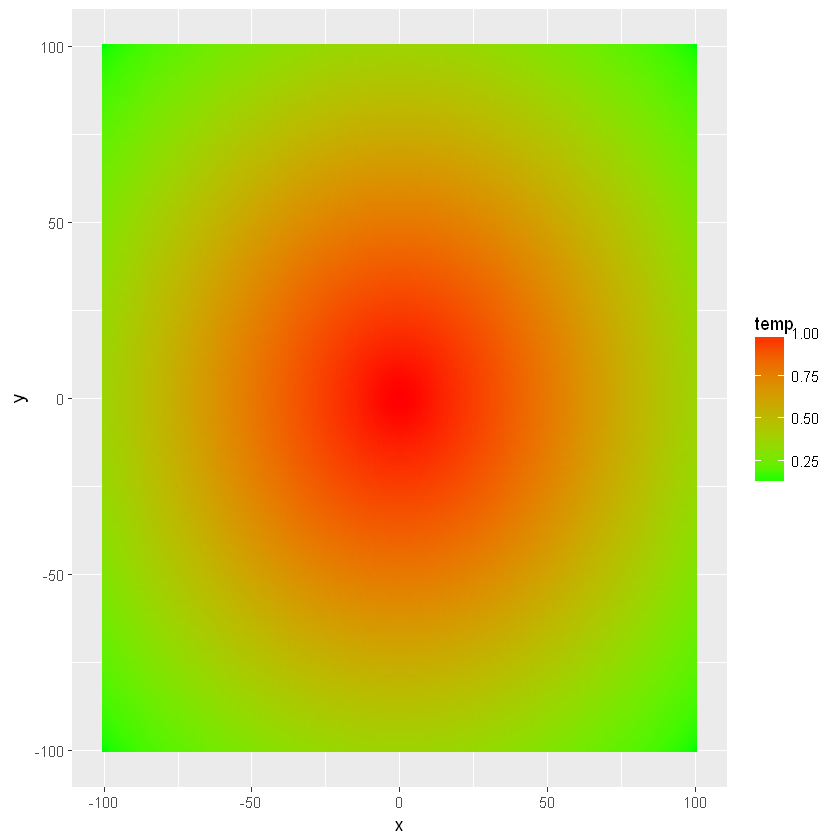

In [78]:
p

In [74]:
field <- setDT(field) # transform en data table, pour utiliser la syntaxe magique
gradx <- field[,.(gradx = c(NA,temp[3:.N],NA)-c(NA,temp[1:(.N-2)],NA), x = x),by = y] #gradient selon x
grady <- field[,.(grady = c(NA,temp[3:.N],NA)-c(NA,temp[1:(.N-2)],NA), y = y),by = x] # gradient selon y
grad <- merge(gradx,grady, by = c("x","y")) # merge des deux

In [79]:
# pour plotter le gradient
gradplot <- grad[x %in% seq(-taille,taille,round(taille/10)) & y %in% seq(-taille,taille,round(taille/10))] 
# je renormalise le gradient pour que la longueur des fleches soit apprÃ©ciable sur le plot
gradplot[,c("gradx","grady"):= .(gradx/max(gradx,na.rm = T)*10,grady/max(grady,na.rm = T)*10)] 

Warning message:
"Removed 80 rows containing missing values (geom_segment)."

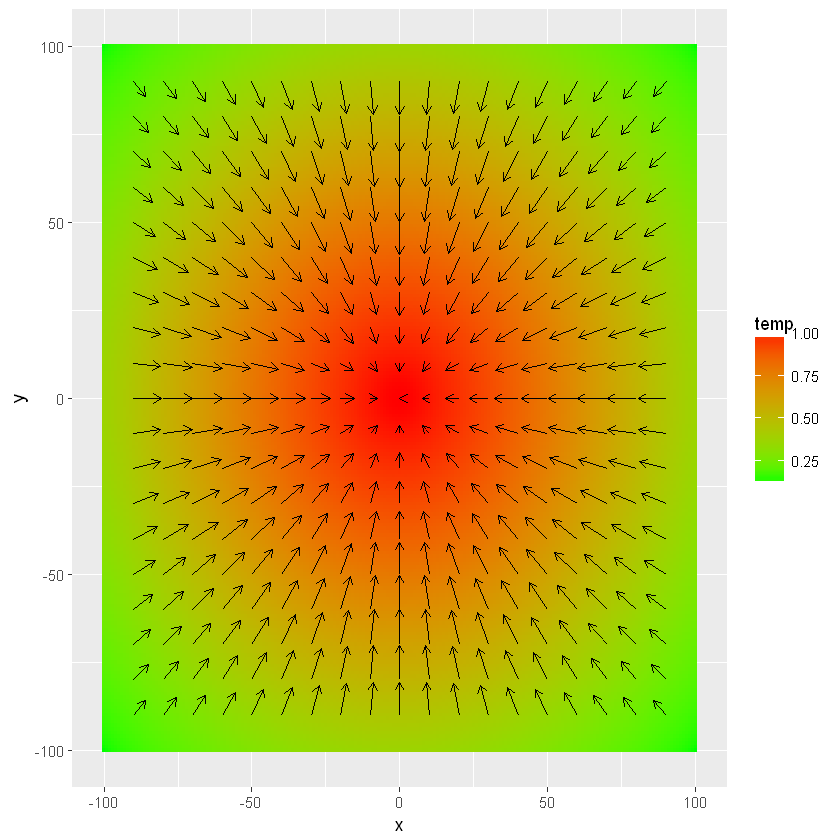

In [80]:
# je rajoute les fleche au plot p du gradient
p + geom_segment(data = gradplot,aes(x,y,xend =x+ gradx,yend =  y+grady), arrow = arrow(length = unit(0.2,"cm"))) 

# exercices

* find the three company that have the biggest delay for each departure site (one or two lines)
* calculate the increase month to month in flight number departure from JFK, per carrier, and plot it in one graph
